<a href="https://colab.research.google.com/github/opsabarsec/polyurethane_basic/blob/main/polyurethane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polyurethanes calculations

In this notebook I show some basic calculations for polyurethane chemistry

In [ ]:
!pip install rdkit

## 1. Describe reactants

In [ ]:
import rdkit
from rdkit import Chem
import rdkit.Chem.rdMolDescriptors

You can draw your molecule on this website
https://www.cheminfo.org/Chemistry/Cheminformatics/FormatConverter/index.html
and get the corresponding formula for the SMILE. For example a triol that will react with di-isocyanates to form a polyurethane


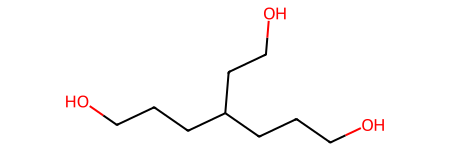

In [ ]:
triol = Chem.MolFromSmiles('OCCCC(CCO)CCCO')
polyol_functionality = 3
triol

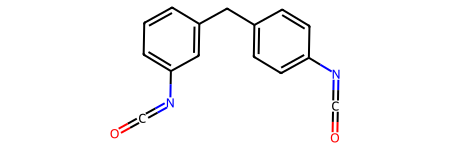

In [ ]:
MDI_isocyanate= Chem.MolFromSmiles('c1(cccc(c1)Cc1ccc(cc1)N=C=O)N=C=O')
isocyanate_functionality = 2
MDI_isocyanate

## 2. Properties from structures

In [ ]:
molecular_weight_triol = rdkit.Chem.rdMolDescriptors._CalcMolWt(triol)
molecular_MDI = rdkit.Chem.rdMolDescriptors._CalcMolWt(MDI_isocyanate)

print('molecular weigth of our triol: ', round(molecular_weight_triol,1),'grams/mole', 'number of reactive sites: ', polyol_functionality)
print('molecular weigth of our isocyanate: ', round(molecular_MDI,1),'grams/mole', 'number of reactive sites: ', isocyanate_functionality)

molecular weigth of our triol:  176.3 grams/mole number of reactive sites:  3
molecular weigth of our isocyanate:  250.3 grams/mole number of reactive sites:  2


## 3. Finally some calculations

In [ ]:
Equivalent_weight_polyol = molecular_weight_triol/polyol_functionality
Equivalent_weight_isocyanate   = molecular_MDI/isocyanate_functionality

print('Equivalent weight of polyol: ', round(Equivalent_weight_polyol,1),'grams/eq')
print('Equivalent weight of isocyanate: ', round(Equivalent_weight_isocyanate,1),'grams/eq')

Equivalent weight of polyol:  58.8 grams/eq
Equivalent weight of isocyanate:  125.1 grams/eq


The OH value which nobody seems to get at first sight is the ratio of the equivalent weight of KOH (used to titrate the polyol) to the equivalent weight of the polyol

In [ ]:
molecular_weight_KOH = 56.1
mg_per_gram = 1000
reactive_sites_koh = 1
equivalent_weight_KOH = molecular_weight_KOH*mg_per_gram/reactive_sites_koh

print('Equivalent weight of KOH: ', round(equivalent_weight_KOH,1))
OH_value = equivalent_weight_KOH/Equivalent_weight_polyol
print('OH value: ', round(OH_value,3))

Equivalent weight of KOH:  56100.0
OH value:  954.861


In [ ]:
weight_OH = 17
percent_OH = (OH_value*100*weight_OH)/(Equivalent_weight_polyol*1000)
print('Percent OH: ', round(percent_OH,1), '%')

Percent OH:  27.6 %


When a polyol is supplied often we get both OH value and functionality. Easy to get the molecular weight from this information

In [ ]:
MW_polyol = polyol_functionality*molecular_weight_KOH*1000/OH_value
print('Molecular weight of polyol: ', round(MW_polyol,1), 'g/mol')

Molecular weight of polyol:  176.3 g/mol


## 3. How much do we need for the reaction?


In [ ]:
isocyanate_index = 1.1
# the isocyanate index is the ratio between the isocyanate really needed and that needed theoretically.
# Empirical value that depends also on additions of other reactants such as water if we make a polyurethane foam

In [ ]:
weight_polyol = 100
print("I start the reaction with",weight_polyol,"grams of polyol")
equivalents_polyol = weight_polyol/Equivalent_weight_polyol
print("corresponding to",round(equivalents_polyol,1),"OH gram equivalents")

I start the reaction with 100 grams of polyol
corresponding to 1.7 OH gram equivalents


In [ ]:
grams_isocyanate =equivalents_polyol*Equivalent_weight_isocyanate*isocyanate_index
print("I need",round(grams_isocyanate,1),"grams of isocyanate")

I need 234.3 grams of isocyanate
